### BANK MARKETING CAMPAIGN

#### Business Problem Understanding

**Context**

The types of financial products used by the public are more varied. One financial product that is well-known to the public is **term deposits**. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. This scheme **will allow banks to invest** in higher-yield financial products **to generate profits**. The more customers make deposits, the more the bank will be able to increase its investment and profits. But in return,  customers receive fixed interest based on their deposited amount. In bank industry it's called Loan Deposit Ratio (LDR) . LDR = Total Loans / Total Deposit. (source: https://www.investopedia.com/terms/l/loan-to-deposit-ratio.asp) If a bank's deposits are increasing, new money and new clients are being on-boarded. As a result, the bank will likely have more money to lend, which should increase earnings. **One effective strategy to attract customers to subscribe to a term deposit is through marketing campaigns.**

**Problem Statement**

Bank marketing campaign serves as a bridge between financial institutions and customers, allowing banks to promote their products and services while offering customers with valuable information, choices, and convenience. When executed effectively, bank marketing campaign benefits both the bank and its customers by building trust, enhancing financial well-being, and maintaining long-term relationships. Fosucing on the term deposit product, the bank should be able to conduct a marketing campaign to the right customers who are likely to make a deposit or, in other words, target the right customers. It should minimize the possibility of targeting customers who are not willing to make a deposit but also keep maintaining relationship with them.

**GOALS**

So based on that problem statement above, the bank aims to identify their customers that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients. The bank wants to have the ability to predict which customers are likely to deposit and conduct marketing campaign to those who genuinely want to subscribe a term deposit. The bank also wants to identify the most important features in subscribing deposits. This way, in the future, the bank can focus on those features. Customers are divided into two targets.
 
Targets :  
*   0 : customer will not subscribe a term deposit
    
*   1 : customer will subscribed a term deposit

**We will build a classification model to help the bank predict whether a customer will subscribe to a term deposit or not.**

**Analytical Approcah**

In classification model, it is crucial to choose the right evaluation metrics. The choice of classification metric depends on the nature of the problem and the specific goals of the classification task. Some common types of classification metrics are accuracy, precision, recall, F1 score, and area under the ROC-AUC.

METRIC EVALUTAION

We will use confusion matrix for evaluating the performance of our classification model. Confusion matrix is widely used because it gives a better idea of a model’s performance. The matrix compares the actual target values with those predicted by the machine learning model. A good model is one which has high TP and TN rates, while low FP and FN rates. In our case, **we want to conduct a marketing campaign accurately for customers who will subscribe a term deposit and keep maintaining a good relationship with all customers.**

![Sample Image](https://miro.medium.com/v2/resize:fit:1218/format:webp/1*jMs1RmSwnYgR9CsBw-z1dw.png)

Type I error: FP (False Positives)

We predict the customers will subscribe term deposit, but in reality, they DON'T. The consequences here is the bank will waste time and money by conducting campaigns for the wrong customers.

Type II error: FN (False Negatives)

We predict the customers will NOT subscribe term deposit, but in reality, they DO. The consequences here is the bank will create a negative impression with customers by not providing them a proper campaign, which can lead to worsening the relationship with customers and a missed opportunity to promote their products.

Therefore we don't want these two type of error to happen. **So we will use F1 score metrics for the classification evaluation**. F1 score is types of classification metrics that helpful when we want to consider both false positives and false negatives.

#### Data Understanding and Cleaning

In [52]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [53]:
# Load dataset
df = pd.read_csv('../dataset/data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [54]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


*   Dataset contains information of Bank Deposit Marketing Campaign. The marketing campaigns were based on phone calls.
*   Dataset contains of 11 columns dan 7813 rows and  two datatype which are objects dan integers. Total customers during this campaign is 7813.
*   From the information, it can also be seen that **there is no missing value**.

### Features Information

| Feature | Data Type | Description |
| --- | --- | --- |
| **Customer Profile**  |
| age | numerical | Age of customer |
| job | categorical | Job of customer |
| balance | numerical | Customer's individual balance |
| housing | categorical | If costumer has housing loan |
| loan | categorical | If costumer Has Personal Loan |
| **Marketing Data**  |
| contact | categorical | Communication type |
| month | categorical | Last contact month of year |
| campaign | numerical | Number of contacts performed during this campaign and for this client |
| pdays | numerical | Number of days after the client was contacted from the previous campaign |
| poutcome | categorical | Outcome of the previous marketing campaign |
| deposit | categorical | Whether the customer deposits or not |

*   The target in this classification model is `deposit`, so deposit value will be replace with 0 and 1.

In [55]:
# Checking unique value in deposit feature
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [56]:
# Replacing deposit values into 0 and 1
label_mapping = {'no':0, 'yes': 1}
df['deposit'] = df['deposit'].map(label_mapping)

In [57]:
# Checking statistic description of numeric and categorical features 
# Numeric Feature
df.describe()

,age,balance,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550,0.477665
std,11.919710,3089.291831,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


In [58]:
# Categorical Feature
df.describe(include=['O'])

,job,housing,loan,contact,month,poutcome
count,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1792,4140,6789,5628,1976,5819


Some things to consider from statistic description:

*   Customer's age is between 18 up to 95 years old.
*   Minimum balance is -6847. In banking and finance institutions, a negative balance means that the account holder owes money to the bank instead of having funds in the account. This also can occur when customer has outstanding charges, fees, or withdrawals that exceed the account's available funds.
*   The average balance also shows a substantial difference when compared to the maximum balance
*   The average number of contacts performed during the campaign is 2, while the maximum campaign count is 63. There is a very significant gap.
*   Minimum number of days after the client was contacted from the previous campaign is -1. This means client was not previously contacted. The maximum number is 854 days or more than 2 years.
*   Majority of the outcome of the previous marketing campaign is unknown which means it typically signifies that there is no information available or recorded regarding how the bank or marketing team contacted or communicated with customers corresponding.

In [59]:
# Checking unique value in every features. It is important for better understanding with dataset.
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Value
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


*   Categorical features that have more than 5 unique value are job and month.
*   There is no ordinal categorical feature in dataset.
*   Age, balance, pdays, and campaign are all numerical features with a large number of unique values, which is typical for numerical data type.
*   pdyas represents the number of days after the client was contacted from the previous campaign. It starts with -1, indicating that the customer was not previously contacted.
*   poutcome refers to the outcome of the previous marketing campaign and it contains 4 values. It is so rare to have both 'other' and 'unknown' values in this field. We will treat 'other' and 'unknown' as the same meaning which is the previous outcome is still unknown whether it is a failure or a success. So, other will be replace with 'unknown'.
*   contact has 3 values when it should have only two types for phone-call-based campaigns which are 'cellular' or ' telephone'. The 'unknown' contact type could be indicate that the customer has not yet been contacted, or pdays is -1. So, We will consider excluding the 'unknown' contact type with pdays value that not equal to -1 as outliers, and we will remove them to improve our analysis and model predictions.
*   __All features are nessecary for advanced analysis and modelling so we will not drop any column/feature.__

In [82]:
# Replacing 'other' with 'unknown' in poutcome column 
df['poutcome'] = df['poutcome'].replace('other', 'unknown')

In [87]:
# Removing pdays in contact column that not equal to -1
rows_to_drop = df[(df['contact'] == 'unknown') & (df['pdays'] != -1)].index
df = df.drop(index = rows_to_drop)
df.shape

(7797, 11)

In [88]:
# Checking duplicate data
df.duplicated().sum()

8

In [89]:
# Checking detail duplicate data
df[df.duplicated]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,0
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,0
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,0
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1


*   There are 8 data duplicates in dataset. We prefer not to delete them because we believe that our dataset lacks a complete column for banking customer data, such as an ID or primary keys for each customer. Therefore, duplicate in this dataset is still possible to happen. 

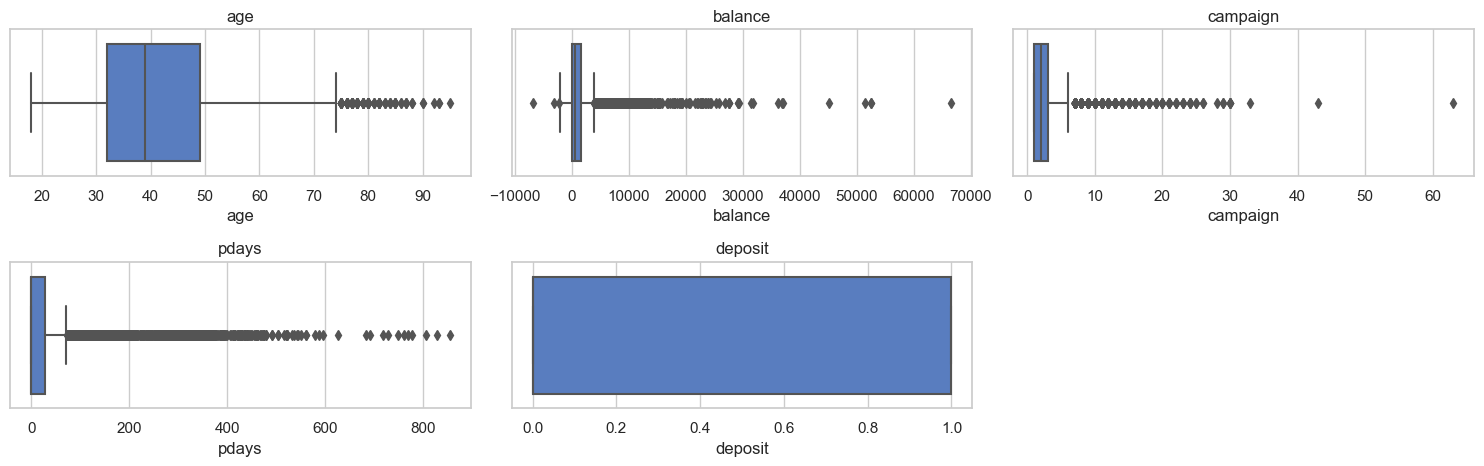

In [90]:
# Checking distribution of all numerical features
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='muted')
plotnumber = 1

num_clos = ['age','balance', 'campaign', 'pdays', 'deposit']   
for cols in num_clos:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=cols, data=df);
    plt.title(cols, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

*   Each feature outside deposit has numerous outliers, indicating that they are not normally distributed. We are considering not removing the outliers because they are still relevant for the banking marketing deposit campaign dataset.
*  The majority of campaigns were fewer than 10 times, indicating that the bank had very few interactions with customers during this campaign.
*   There are no outliers in the 'deposit' feature because this target variable only has two values: 'yes' = 1 and 'no' = 0

#### EXPLORATORY DATA ANALYSIS (EDA)

After understanding and cleaning the dataset we will proceed to EDA process. The EDA is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

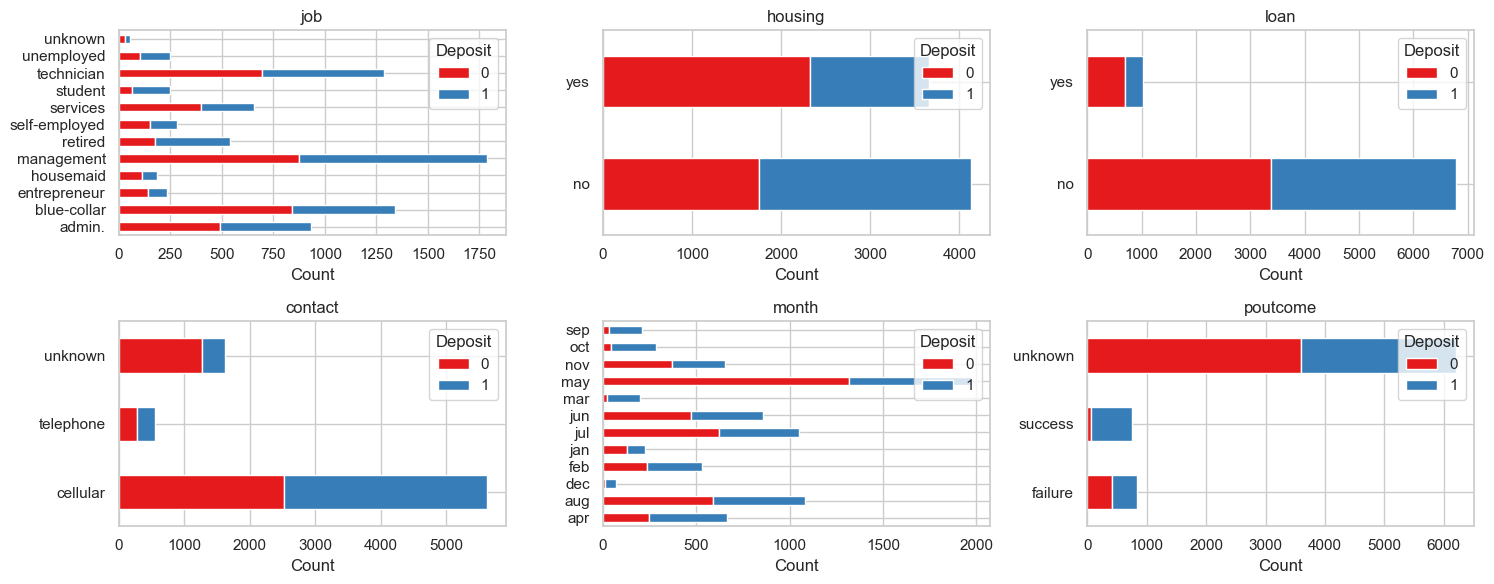

In [134]:
# Visualize the distribution of all categorical featuress
categorical_col = df.select_dtypes(include=['object']).columns
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axes = axes.ravel()
palette = sns.color_palette("Set1")

for i, column in enumerate(categorical_col):
    ax = axes[i]
    cross_tab = pd.crosstab(index=df[column], columns=df['deposit'])
    cross_tab.plot(kind='barh', stacked=True, color=palette, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Count')
    ax.set_ylabel(None)
    ax.legend(title='Deposit', loc='upper right')

plt.tight_layout()
plt.show()

*   The majority of customers have jobs in management filed and resulting in more deposits than non-deposits, followed by blue-collar and technician roles.
*   The outcome of the previous marketing campaign is mostly unknown, and very few successes. However, even with a successful outcome, there are still no deposits.
*   The dominant contact month for customers is in May, with mostly no deposits, and the preferred contact method is cellular.
*   The majority of customers do not have housing or personal loans. Customers who do not have housing loans will tend to make deposits.

In [96]:
# Defining age life stage of customers
age = df[['age', 'deposit', 'balance']]
def age_level(row):
    if (row <= 19):
        val = "Teenagers (<19)"
    elif (row > 19) & (row <= 39):
        val = "Young_Adult (20-39)"
    elif (row > 39) & (row <= 59):
        val = "Middle_Aged_Adults (40-59)"
    else:
        val = "Senior Adults (>60)"
    return val
age['age_life_stage'] = age['age'].apply(age_level)
age_chart= age['age_life_stage'].value_counts().reset_index().rename(columns= {'index':'age_life_stage','age_life_stage':'number of customers'})

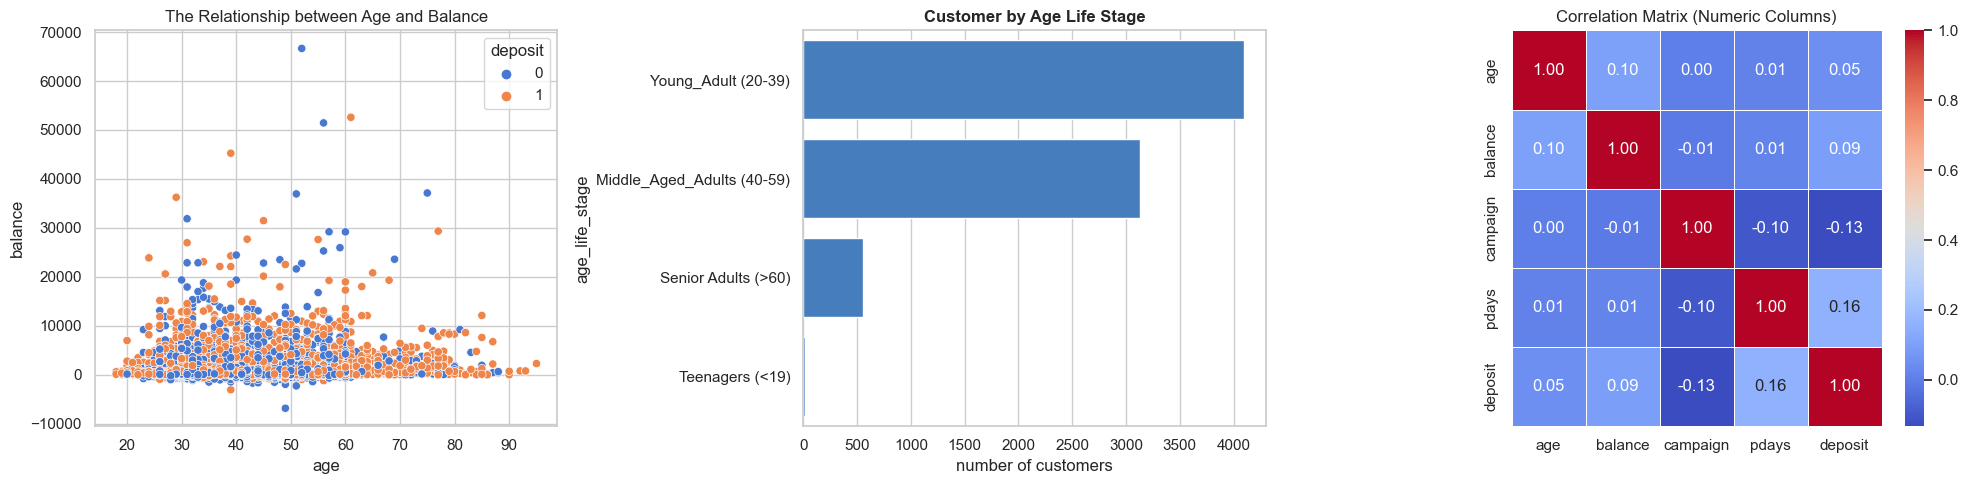

In [97]:
# Visulize Relationship between Age and Balance, Customer age life stage and correlation numerical features
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data=df, x='age', y='balance', hue='deposit', ax=axes[0])
axes[0].set_title('The Relationship between Age and Balance')

sns.barplot(data=age_chart, y='age_life_stage', x='number of customers', palette=['#337CCF'], ax=axes[1])
axes[1].set_title('Customer by Age Life Stage', fontweight='bold')

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[2])
axes[2].set_title('Correlation Matrix (Numeric Columns)')
plt.tight_layout()
plt.show();

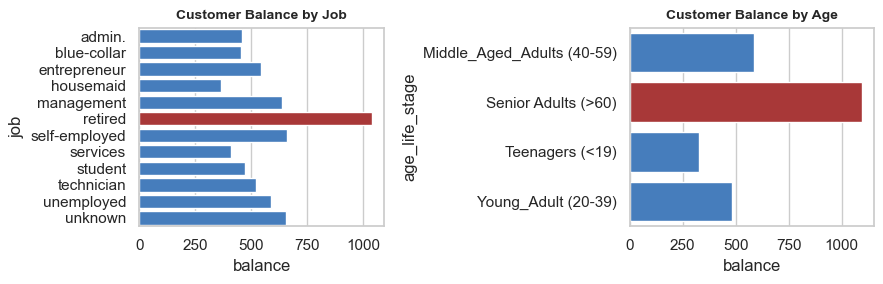

In [98]:
# Visualize balance by job and age
balance_by_job = df.groupby('job')['balance'].median().reset_index()
balance_by_age = age.groupby('age_life_stage')['balance'].median().reset_index()
default_color = '#337CCF'
highest_value_color = '#BB2525' 

fig, axes = plt.subplots(1, 2, figsize=(9, 3))

data_column = 'balance'
data = balance_by_job
highest_value = data[data_column].max()
sns.barplot(x='balance', y='job', palette=[highest_value_color if x == highest_value else default_color for x in data[data_column]],
            data=balance_by_job, ax=axes[0])
axes[0].set_title('Customer Balance by Job', size=10, fontweight='bold')

data_column = 'balance'
data = balance_by_age
highest_value = data[data_column].max()
sns.barplot(x='balance', y='age_life_stage', palette=[highest_value_color if x == highest_value else default_color for x in data[data_column]],
            data=balance_by_age, ax=axes[1])
axes[1].set_title('Customer Balance by Age', size=10, fontweight='bold')

plt.tight_layout()
plt.show()

*   There is no positive relationship between age and balance. This indicates that regardless of the customer's age, the balance does not tend to be higher. From the scatter plot, we can see that neither the highest nor the lowest balances result in deposits.
*   The majority of all customers are young adults, aged between 20 up to 39 years old.
*   Correlation between numeric features show that **there are no strong correlations** among them. All correlation are below 0.2.
*   Customers with a retired job have the highest median balance, and they are typically over 60 years old.

After describing the business problem, defining our goals, understanding the data and conducting EDA, let's now move on to modeling the data.

#### `Machine Learning: Classification`

As we mentioned before, the goal of this modeling is to classify customers into two categories: those who will subscribe to a term deposit and those who will not. So, we will use a classification model to predict which customers will subscribe a term deposit or not, allowing the bank to target the right customers for the campaign.

Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data. 

##### DATA PREPARATION

In [99]:
# Checking target deposit values
df['deposit'].value_counts()

0    4076
1    3721
Name: deposit, dtype: int64

In [100]:
# Target percentage
df['deposit'].value_counts()/len(df['deposit'])*100

0    52.276517
1    47.723483
Name: deposit, dtype: float64

*   From the percentage of deposits, we can conclude that the **dataset is balanced**. Therefore, we will not apply resampling for further steps.

##### Define X and y

In [101]:
X = df.drop(columns=['deposit'])
y = df['deposit']

##### Splitting Data

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

##### PREPROCESSING

Scaling data and converting categorical variables into numerical forms are essential in data preprocessing. We have 10 features and we will divide them into encoding and scalling processes. Encoding is for categorical and scalling is for numerical variables. Based on our previous data understanding, we have already checked the unique values in each feature. For categorical variables, we consider **applying only one-hot encoding**. We won't use binary encoding for 'job' and 'month' even though both have 12 unique values because the number of unique values is still relatively moderate. For all numerical features, we will **apply robust scaling** as it works well with features containing outliers.
 
One Hot Encoding: 'job', 'housing', 'loan', 'contact', 'month', 'poutcome'

Robust Scaling : 'age','balance', 'campaign', 'pdays'

In [103]:
# transformer 
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_clos = ['age','balance', 'campaign', 'pdays']

transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_clos),
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['job', 'housing', 'loan', 'contact', 'month',
                                  'poutcome'])])

#### Model Benchmarking 
For model benchmarking, we will compare different algorithms because there is no one-size-fits-all answer to the question of which algorithm is the best for classification modeling. Each algorithm has different strengths and weaknesses. We will use and compare some popular classification algorithms like Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees and Ensemble Methods such as Random Forests, Gradient Boosting, Voting and Stacking. 

For metrics evaluation, although we are primarily focused on the F1 score, we will also calculate other metric values because they are still valuable for better comparison.

In [104]:
# importing necessary libraries
# algorithm models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# combines several stages of preprocessing or other functions
from sklearn.pipeline import Pipeline

# cross validation to determine the best algorithm
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold

# metrics for classification model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer, fbeta_score
f2_score = make_scorer(fbeta_score, beta=2)
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Define Machine Learning Models
logreg = LogisticRegression(random_state=42)
logreg_penalized = LogisticRegression(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
tree_penalized = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf = RandomForestClassifier()
xgb = XGBClassifier()

estimators = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression(random_state=42))]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42))
votingSoft = VotingClassifier(estimators=estimators, voting='soft')
votingHard = VotingClassifier(estimators=estimators, voting='hard')

models = {'KNN': knn, 
          'Logistic Regression':logreg, 
          'Logistic Regression Penalized': logreg_penalized,
          'Decision Tree': tree,
          'Decision Tree Penalized': tree_penalized,
          'Voting Classifier - Soft': votingSoft,
          'Voting Classifier - Hard': votingHard,
          'Stacking': stacking,
          'Random Forest' : rf,
          'XGBoost' : xgb}

# Define Evaluation Metrics
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score}

# Initialize Lists and DataFrames 
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []
list_algo = []

# Model Evaluation Loop
for name_algo,model in models.items():
    crossval = StratifiedKFold(n_splits=5)      # Validate into 5 split data 
    estimator = Pipeline([
            ('transform', transformer),
            ('model', model),
            ])

    list_algo.append(name_algo)
    scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
    test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
    test_precision_arr.append(scores['test_precision'].mean())
    test_recall_arr.append(scores['test_recall'].mean())
    test_f1_arr.append(scores['test_f1'].mean())
    test_f2_arr.append(scores['test_f2'].mean())

# Create and display model and performance metrics into dataframe
model_bench = pd.DataFrame({
    'algorithm model': list_algo,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})
model_bench

,algorithm model,accuracy,precision,recall,f1,f2
0,KNN,0.661409,0.665889,0.594982,0.628345,0.607873
1,Logistic Regression,0.690099,0.732353,0.570251,0.640941,0.596522
2,Logistic Regression Penalized,0.686244,0.701482,0.609319,0.651756,0.625531
3,Decision Tree,0.619155,0.603211,0.597491,0.600176,0.598524
4,Decision Tree Penalized,0.618620,0.604561,0.588889,0.596499,0.591882
5,Voting Classifier - Soft,0.652620,0.644705,0.614695,0.629236,0.620406
6,Voting Classifier - Hard,0.682311,0.706883,0.586738,0.641172,0.607353
7,Stacking,0.695063,0.724274,0.597849,0.654906,0.619416
8,Random Forest,0.689667,0.701623,0.620430,0.658428,0.635070
9,XGBoost,0.688616,0.702496,0.615054,0.655862,0.630750


*   Based on the performance metric values, we can conclude that all metrics generate values between 0.6 and 0.7, or there is no significant gap between all metrics in each algorithm.
*   We will stick with the F1 score because we want to consider both false positives and false negatives.

In [107]:
# sorting models by the highest f1 score
model_bench.sort_values('f1', ascending=False)

,algorithm model,accuracy,precision,recall,f1,f2
8,Random Forest,0.689667,0.701623,0.620430,0.658428,0.635070
9,XGBoost,0.688616,0.702496,0.615054,0.655862,0.630750
7,Stacking,0.695063,0.724274,0.597849,0.654906,0.619416
2,Logistic Regression Penalized,0.686244,0.701482,0.609319,0.651756,0.625531
6,Voting Classifier - Hard,0.682311,0.706883,0.586738,0.641172,0.607353
1,Logistic Regression,0.690099,0.732353,0.570251,0.640941,0.596522
5,Voting Classifier - Soft,0.652620,0.644705,0.614695,0.629236,0.620406
0,KNN,0.661409,0.665889,0.594982,0.628345,0.607873
3,Decision Tree,0.619155,0.603211,0.597491,0.600176,0.598524
4,Decision Tree Penalized,0.618620,0.604561,0.588889,0.596499,0.591882


*   The best model based on the F1 score is Random Forest. Therefore, we will proceed with the prediction model using Random Forest.

##### `Random Forest`
A Random Forest Classifier is an ensemble machine learning algorithm. It is a versatile and powerful technique that combines multiple decision trees to make predictions. So, how is random forest classifier works? 

a.  Bootstrap Sampling: Random Forest uses bootstrap sampling to create diverse training datasets for each decision tree by randomly selecting subsets of the training data with replacement.

b.  Random Feature Selection: At each decision tree node, only a random subset of features is considered for making decisions.

c.  Decision Tree Building: Each tree splits the data into subsets based on important features, stopping when a certain condition is met  (e.g., a maximum depth is reached).

d.  Voting: For classification, each tree predicts the class, and the final prediction is based on the majority vote among all the trees.

Random Forest is widely used because of its high accuracy and robustness.

##### Test Data Using Random Forest

In [108]:
# Random Forest classifier initialization
rf = RandomForestClassifier()

# Initialize ists for etrics
score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []

# Create a Pipeline
model = Pipeline([
    ('transform', transformer),
    ('model', rf)
])

# Fit and Evaluate the Model    
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_accuracy.append(accuracy_score(y_test, y_pred))
score_precision.append(precision_score(y_test, y_pred))
score_recall.append(recall_score(y_test, y_pred))
score_f1.append(f1_score(y_test, y_pred))
score_f2.append(fbeta_score(y_test, y_pred, beta=2))

# Create and display a dataFrame for model performance
# we will apply hyperparameter tuning, these will be the values before tuning
score_before_tuning = pd.DataFrame({'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1': score_f1,
                                    'F2': score_f2}, 
                                    index=['Random Forest before Tuning']) 
score_before_tuning

,Accuracy,Precision,Recall,F1,F2
Random Forest before Tuning,0.732308,0.74491,0.668099,0.704417,0.682167


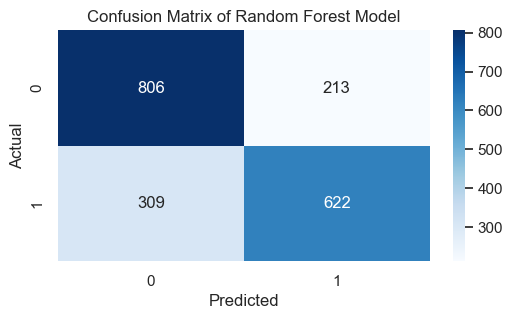

In [109]:
# display confusion matrix from selected benchmarking model or Random Forest Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

Based on the confusion matrix, 213 customers were predicted to subscribe to a term deposit, but in reality, they did not (FP), and 309 customers were predicted not to subscribe to a term deposit, but in reality, they did (FN). This indicates that there are still many errors occurring in the prediction of the test data. Therefore, we will perform hyperparameter tuning on our random forest model to achieve even better results.

##### HYPERPARAMETER TUNING

We will apply **grid search** is a hyperparameter tuning. This is a technique in machine learning that systematically searches through a predefined set of hyperparameter values to **find the best combination for a model's performance**. 

In [110]:
from sklearn.model_selection import GridSearchCV 
# Define hyperparameter search space
hyperparam_space = {
    'model__n_estimators': np.arange(50, 300, 50),      # Number of trees in the forest (default = 100)
    'model__max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the trees (default = None)
    'model__min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node (default = 2)
    'model__min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node (default = 1)
    'model__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for best split (default = sqrt)
    'model__bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees (default = True)
}                                     
# Create random forest classifier
rf = RandomForestClassifier()

# Create pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('model', rf)
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,          
    param_grid=hyperparam_space,    
    cv=5,                           
    scoring = 'f1', 
    n_jobs = -1,
    refit = True                 
)

In [111]:
# fit grid_search to train set
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'campaign',
                                                                          'pdays']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 10, 20, 30, 40, 50],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': array([ 50, 100, 150, 200, 250])},
             scoring='f1')

In [112]:
# best score for grid search
gridsearch.best_score_

0.6783481272118018

In [113]:
# best hyperparameter from grid search
gridsearch.best_params_

{'model__bootstrap': True,
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__n_estimators': 200}

In [114]:
# best model
best_model = gridsearch.best_estimator_
best_model

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('model',
                 RandomForestClassifier(min_samples_split=10,
                                        n_estimators=200))])

In [115]:
# Best tuned model
rf_tuning = gridsearch.best_estimator_
# Fit the best tuned model to the training data
rf_tuning.fit(X_train, y_train)
# Make predictions on the test data
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Enumerate classification metrics
accuracy_rf_tuning = accuracy_score(y_test, y_pred_rf_tuning)
precision_rf_tuning = precision_score(y_test, y_pred_rf_tuning)
recall_rf_tuning = recall_score(y_test, y_pred_rf_tuning)
f1_rf_tuning = f1_score(y_test, y_pred_rf_tuning)
f2_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)

# Create and display model performance
score_after_tuning = pd.DataFrame({'Accuracy': accuracy_rf_tuning, 
                                   'Precision': precision_rf_tuning, 
                                   'Recall': recall_rf_tuning, 
                                   'F1': f1_rf_tuning,
                                   'F2' : f2_rf_tuning}, index=['Random Forest after Tuning'])
score_after_tuning

,Accuracy,Precision,Recall,F1,F2
Random Forest after Tuning,0.745641,0.771536,0.663802,0.713626,0.682873


In [116]:
score_before_tuning

,Accuracy,Precision,Recall,F1,F2
Random Forest before Tuning,0.732308,0.74491,0.668099,0.704417,0.682167


*   It can be seen that the Random Forest model after we have tuned the hyperparameters has a better f1 value, although it only increases slightly.

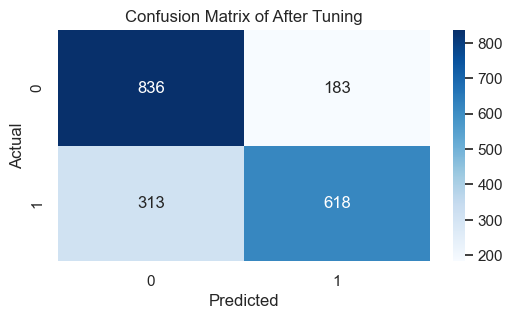

In [117]:
# display confusion matrix from Random Forest Model after Tuning
from sklearn.metrics import confusion_matrix
cm_tuning = confusion_matrix(y_test, y_pred_rf_tuning)
plt.figure(figsize=(6,3))
sns.heatmap(cm_tuning, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of After Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

Based on the confusion matrix after tuning, 183 customers were predicted to subscribe to a term deposit, but in reality, they did not (FP), and 313 customers were predicted not to subscribe to a term deposit, but in reality, they did (FN). This result is better than before we applied tuning especially in FP, although there are still many errors occurring in the prediction of the test data. These errors can happen due to outliers and the poor quality of the data we have, both of which can severely impact model performance.

The model after tuning has actually minimized errors, especially in the case of FP. Before tuning, there were 213 errors, and after tuning, it reduced to 183 errors.

In [118]:
# classification report comparison
from sklearn.metrics import classification_report
report_before_tuned = classification_report(y_test, y_pred)
report_after_tuned = classification_report(y_test, y_pred_rf_tuning)

print('Classification Report Random Forest Before Tuning : \n', report_before_tuned)
print('Classification Report Random Forest After Tuning : \n', report_after_tuned)

Classification Report Random Forest Before Tuning : 
               precision    recall  f1-score   support

           0       0.72      0.79      0.76      1019
           1       0.74      0.67      0.70       931

    accuracy                           0.73      1950
   macro avg       0.73      0.73      0.73      1950
weighted avg       0.73      0.73      0.73      1950

Classification Report Random Forest After Tuning : 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1019
           1       0.77      0.66      0.71       931

    accuracy                           0.75      1950
   macro avg       0.75      0.74      0.74      1950
weighted avg       0.75      0.75      0.74      1950



Again, it can be seen that the Random Forest model after tuning the hyperparameters has a better classification report, eventhough only slightly better. Let's apply another tuning to get better result for f1 score. We will adjust the hyperparameters to be close to the best hyperparameters that we obtained before from grid search.

##### HYPERPARAMETER TUNING 2

In [119]:
# Define hyperparameter search space to be close to the best param from fisrt tuning
hyperparam_space = {
    'model__n_estimators': [180, 190, 200, 210, 220],    # Values close to 200  
    'model__max_depth': [None],                          # Keep this constant
    'model__min_samples_split': [8, 9, 10, 11, 12],      # Values close to 10   
    'model__min_samples_leaf': [1],                 # Keep this constant   
    'model__max_features': ['sqrt'],                # Keep this constant  
    'model__bootstrap': [True]                      # Keep this constant               
}                                      
# Create random forest classifier
rf_2nd_tuning = RandomForestClassifier()

# Create pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('model', rf_2nd_tuning)
])

# Define Grid Search
gridsearch_2nd_tuning = GridSearchCV(
    estimator=pipe_model,          
    param_grid=hyperparam_space,    
    cv=5,                           
    scoring = 'f1', 
    n_jobs = -1,
    refit = True                 
)

In [120]:
# fit grid_search to train set
gridfit_2nd_tuning = gridsearch.fit(X_train, y_train)
gridfit_2nd_tuning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'campaign',
                                                                          'pdays']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 10, 20, 30, 40, 50],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': array([ 50, 100, 150, 200, 250])},
             scoring='f1')

In [121]:
# best score for the 2nd grid search
best_score_2nd_grid = gridsearch.best_score_
best_score_2nd_grid

0.6781531007977947

In [122]:
# best hyperparameter from the 2nd grid search
best_params_2nd_grid = gridsearch.best_params_
best_params_2nd_grid

{'model__bootstrap': False,
 'model__max_depth': 20,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 10,
 'model__n_estimators': 50}

In [123]:
# 2nd tuning best model
best_model_2nd_tuning = gridsearch.best_estimator_
best_model_2nd_tuning

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=50))])

In [124]:
# define model
best_model_2nd_tuning = gridsearch.best_estimator_
# Fit the best tuned model to the training data
best_model_2nd_tuning.fit(X_train, y_train)
# Make predictions on the test data
y_pred_rf_2nd_tuning = best_model_2nd_tuning.predict(X_test)

# Enumerate classification metrics
accuracy_rf_2nd_tuning = accuracy_score(y_test, y_pred_rf_2nd_tuning)
precision_rf_2nd_tuning = precision_score(y_test, y_pred_rf_2nd_tuning)
recall_rf_2nd_tuning = recall_score(y_test, y_pred_rf_2nd_tuning)
f1_rf_2nd_tuning = f1_score(y_test, y_pred_rf_2nd_tuning)
f2_rf_2nd_tuning = fbeta_score(y_test, y_pred_rf_2nd_tuning, beta=2)

# Create and display model performance
score_after_2nd_tuning = pd.DataFrame({'Accuracy': accuracy_rf_2nd_tuning, 
                                   'Precision': precision_rf_2nd_tuning, 
                                   'Recall': recall_rf_2nd_tuning, 
                                   'F1': f1_rf_2nd_tuning,
                                   'F2' : f2_rf_2nd_tuning}, index=['Random Forest after 2nd Tuning'])
score_after_2nd_tuning

,Accuracy,Precision,Recall,F1,F2
Random Forest after 2nd Tuning,0.749231,0.782609,0.657358,0.714536,0.679095


In [125]:
# Combine all tuning model into a single DataFrame
combined_scores = pd.concat([score_before_tuning, score_after_tuning, score_after_2nd_tuning])
combined_scores

,Accuracy,Precision,Recall,F1,F2
Random Forest before Tuning,0.732308,0.744910,0.668099,0.704417,0.682167
Random Forest after Tuning,0.745641,0.771536,0.663802,0.713626,0.682873
Random Forest after 2nd Tuning,0.749231,0.782609,0.657358,0.714536,0.679095


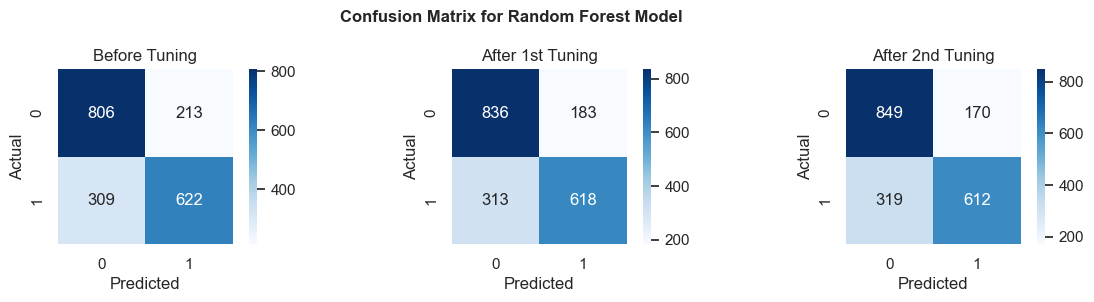

In [126]:
# display confusion matrix from Random Forest Model before and after Tuning
plt.figure(figsize=(12,3))
plt.suptitle('Confusion Matrix for Random Forest Model', fontsize=12, fontweight='bold')
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Before Tuning')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuning), annot=True, fmt='.0f', square=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('After 1st Tuning')

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_2nd_tuning), annot=True, fmt='.0f', square=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('After 2nd Tuning')
plt.tight_layout()
plt.show();

*   After applying the second round of hyperparameter tuning, we found that the F1 score improved very slightly, by only 0.00091%. Therefore, there is no need to proceed with further hyperparameter tuning, as the results are not expected to change significantly.
*   From confusion matrix we can conclude that, the model predicts correctly 612 customer who will subscribe term deposit and predict incorrectly 170 customer (type I error : FP), who were predicted subscribe a term deposit but actually they will not. It's worth noting that the number of false positives (FP) has significantly decreased from 213 to 170 customers, indicating that the model is performing exceptionally well.
*   Up to second tuning, the number of customers who were predicted not to subscribe to a term deposit but actually did (Type II error: FN) increased from 309 to 319 customers. In reality, this can be profitable for the bank since their goal is to increase deposits. However, this will also can worsening the relationship between customer and the bank. Because building and maintaining strong customer relationships are essential in the banking industry.
*   When customers who are actually interested in subscribing to a deposit are not included in the deposit marketing campaign, they may feel underserved or neglected. There is a significant chance that they will withdraw their balances, leading to the loss of customers for the bank. That is why, from the beginning, we chose the metric evaluation to consider both types of errors.

In [127]:
# classification report comparison
from sklearn.metrics import classification_report
report_before_tuned = classification_report(y_test, y_pred)
report_after_tuned = classification_report(y_test, y_pred_rf_tuning)
report_after_2nd_tuned = classification_report(y_test, y_pred_rf_2nd_tuning)

print('Classification Report Random Forest Before Tuning : \n', report_before_tuned)
print('Classification Report Random Forest After 1st Tuning : \n', report_after_tuned)
print('Classification Report Random Forest After 2nd Tuning : \n', report_after_2nd_tuned)

Classification Report Random Forest Before Tuning : 
               precision    recall  f1-score   support

           0       0.72      0.79      0.76      1019
           1       0.74      0.67      0.70       931

    accuracy                           0.73      1950
   macro avg       0.73      0.73      0.73      1950
weighted avg       0.73      0.73      0.73      1950

Classification Report Random Forest After 1st Tuning : 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1019
           1       0.77      0.66      0.71       931

    accuracy                           0.75      1950
   macro avg       0.75      0.74      0.74      1950
weighted avg       0.75      0.75      0.74      1950

Classification Report Random Forest After 2nd Tuning : 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      1019
           1       0.78      0.66      0.71       931

    accuracy  

Based on the classification report of the Random Forest model before and after tuning the hyperparameters, the second tuning showed a classification report that was better than the first one by only 1%. From the second tuning, we can conclude that:

*   From precision results, target 0 which represents customer who will not subscribe a term deposit, it generated precision score 0.73. This means that out of all customers that predicted will not subscribe deposit, 27% of them were incorrect predictions (false positive). Target 1 which is customer who will subscribe a term deposit generate score 0.78. This means from all customers that predicted to subscribe deposit, 22% of them were incorrect predictions.

*    From Recall results, for target 0 (customers who will not subscribe to a term deposit) it generate 0.83. This means model managed to identify 83% of them correctly. In other words, and only misses 17%. Target 1 which is customer who will subscribe a term deposit generate 0.66. This means model managed to identify 66% of them correctly but misses 34%.

*   From f1 score is the combined result of precision and recall and measures the balance between them. Target 0 generate 0.78 and for target 1 generate 0.71. **An F1 score of 0.7 or higher is often considered good. Therefore, our model have a good balance between precision and recall for both which customer who will subscribe a term deposit or will not.**

#### Feature Importances
Let's now see which features/columns are the most important for our selected model Random Forest. Feature importances provide insights into which features or variables are the most influential in our prediction.

In [128]:
# displaying feature and importance in a dataframe
col_names = [x.split('__')[1] for x in transformer.get_feature_names_out()]
feature_importance = pd.DataFrame({
    'feature': col_names,
    'importance': best_model['model'].feature_importances_
}).sort_values('importance', ascending=False)

feature_importance.head()

,feature,importance
1,balance,0.186886
0,age,0.160479
2,campaign,0.079680
3,pdays,0.070592
30,poutcome_success,0.065572


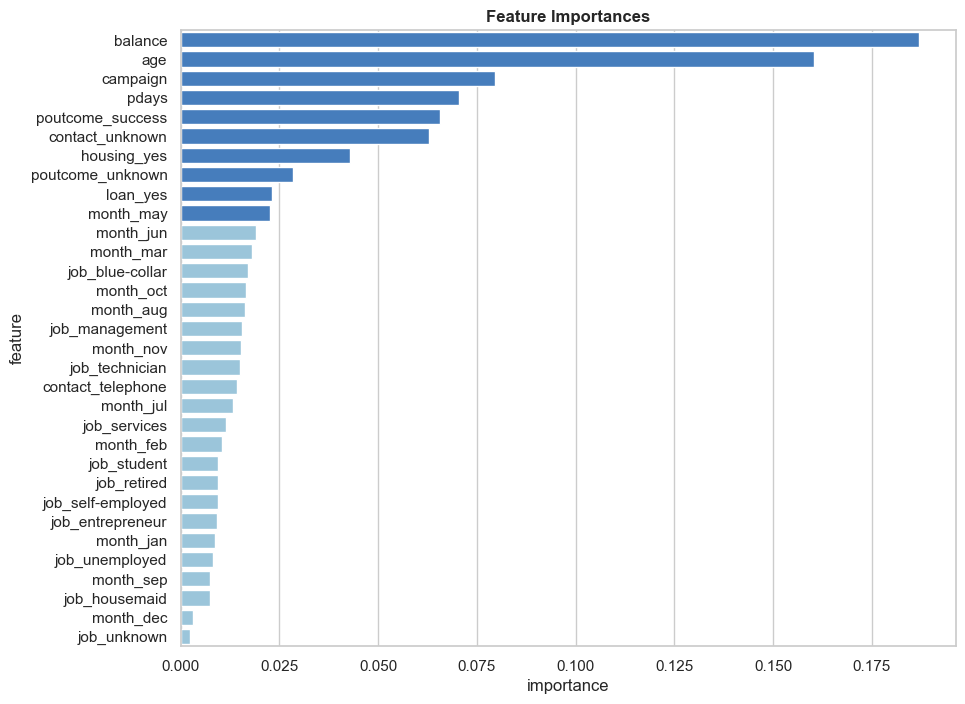

In [129]:
# visualize all the feature importance
plt.figure(figsize=(10,8))
colors = ['#337CCF' if i in range(10) else '#91C8E4' for i in range(33)]
sns.barplot(data=feature_importance, x='importance', y='feature', palette=colors)
plt.title('Feature Importances', fontweight='bold')
plt.show()

*   From all features, 'balance' is the most important feature, followed by 'age' and 'campaign' (number of contacts performed during this campaign and for a customer). We highlight the top 10 most important features in our model. These features have the most significant influence on the prediction result.
*   The least influential features can be excluded from the next modeling to enhance prediction accuracy and further develop the dataset.

In [ ]:
# Model Akhir
import pickle
best_model_2nd_tuning = gridsearch.best_estimator_
campaign_model = best_model_2nd_tuning.fit(X_train, y_train)
pickle.dump(campaign_model, open('dataset/bank-campaign-best-model.sav', 'wb'))

#### CONCLUSION AND RECOMMENDATION

##### Conclusion

+   The best model for predicting which customers will subscribe to a term deposit based on the dataset we have is Random Forest. The bank can conduct campaigns targeting customers predicted to subscribe to a term deposit.
+   We have applied hyperparamater tuning twice and the F1 score improved only very slightly.
+   The feature 'balance' is the most important feature, followed by 'age' and number of days after the custumer was contacted from the previous campaign. The bank can prioritize these features for better accuracy.
+   Based on the classification report, we can conclude that if the bank applies this model to predict which customers will subscribe to a term deposit and then contacts them for marketing campaigns, this model can minimize 78% of the customers who will not subscribe to a term deposit, thus preventing the bank from contacting them. Additionally, the model can correctly identify 71% of all customers who will subscribe to a term deposit. 
+   If the bank wants to conduct marketing campaigns so that the customers subscribe a term deposit,  let's assume the number of customers targeted is based on the number of data test, which is 1.952, what is the impact of applying this model ?

    Based on information from (https://www.liveagent.com/customer-support-glossary/call-time/#:~:text=The%20global%20standard%20for%20average,differ%20based%20on%20the%20industry.). The global standard for average **call duration is 4 minutes per call,** however, that may differ based on the industry.  LiveAgent is a fully-featured Help Desk and live-chat software about customer interactions with an all-in-one help desk solution.

    From (https://www.twilio.com/blog/call-center-services-pricing), standard call rate is between $0.50 to $1.75 per minute. We can use 0.5 as an example.

    **Without Model : all customer will be contacted for campaigns to subscribe a term deposit**

    *   Total time consumed : 1.950 x 4 = 7.800 minutes ~  2.2 hours
    *   Totall cost         : 1.950 x 0.5 = $975

    **With Model : ONLY customer who predicted to subscribe a term deposit will be contacted**

    *   Total time consumed : 782 x 4 = 3.128 minutes ~  0,9 hour
    *   Totall cost         : 782 x 0.5 = $391

    *   Time Saved          : 7.800 - 3.128 = 4.672 minutes ~ **1,3 hours**
    *   Cost Saved          : 975 - 391 = **$584**

    If the customer base grows larger, the total time and cost of the campaign will also increase. However, by using the model, the bank can save a significant amount of time and money when conducting marketing campaigns aimed only at customers subscribing to a term deposit.
    
##### Recommendation
Things that can be done to develop this project :

**Model**
+   Continually updating with new machine learning model, in this data driven world new model can be found at any time, the bank can explore new model, apply further tuning with different parameter to find better prediction accuracy.
+   The bank also can try another machine learning algorithm such as clustering method to find best segmentation within their data. For instance, they can determine which job categories or age groups are most likely to subscribe a term deposit. This approach is valuable because during EDA,the majority customers have job in management field but the job with highest balance is customer who already retired. Same with age, teh majority of customers are young adult (20-39 years old) but highest balance are customers over 60 years old. The comparison is made with balance because this feature is the most important.

**Data**
+   The data should included customer ID as primary key column to ensure there are no duplicate data.
+   New features or columns that could be related to the bank's marketing campaign for customers should be added. For example, the 'duration' which represents the last contact duration in seconds (numeric). This attribute highly affects the output target (e.g., if duration=0 then deposit='no'). Another relevant feature to consider adding is 'previous' feature. `previous` means number of contacts performed before this campaign and for a client (numeric). 

**Bisnis**
+   The bank can explore alternative campaign methods that do not require extensive resources, such as utilizing WhatsApp or email blasts to reach out to all customers and promote products like term deposits. HOWEVER, phone calls are a more effective approach to enhance customer engagement.
+   Consider offering incentives such as higher interest rates for longer-term and higher deposits or referral bonuses to encourage both new and existing customers to invest in term deposits.
+   Create a sense of urgency by introducing limited-time offers or promotions. This approach can motivate customers to take action quickly and make decisions about term deposits.
+   Ensure that the online and offline application process for opening a term deposit account are user-friendly and efficient. Remove any barriers that could discourage potential customers from completing the process.

**_THANK YOU......_**